In [ ]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt
%pylab inline
from scipy.stats import norm

import StressEQs
StressEQs

# Import observation data
## Read in files, fix longitudes, split measurements, map data

In [ ]:
obsFile = pd.read_csv('../EuropaCycloids_Cusps/Cusp_lat_long_angle_ARR.csv', header = None, names = ['Lat','Lon','Angle'])
obsFile2 = pd.read_csv('../EuropaCycloids_Cusps/Takeoffangles.csv')
obsFileCompleteDataSet = pd.read_csv('../EuropaCycloids_Cusps/CuspDataFromKyleMohr_Trimmed.csv')
print(len(obsFile))
print(len(obsFile2))
print(len(obsFileCompleteDataSet))


In [15]:
obsFileCompleteDataSet[0:10]

,Cusp_ID,Id,Cycloid_Nu,Confidence,CompassA,DirMean,CirVar,AveX,AveY,AveLen,Lat_dd,Long_dd
0,1,1,1,1,1.138698e+02,336.130193,0,-4672598.945,1.237397e+06,20759.508500,45.386,8.614
1,1,1,1,1,3.572737e+02,92.726311,0,-4682785.423,1.244409e+06,4171.917871,45.644,8.240
2,2,2,1,1,6.273258e+01,152.732584,0,-4670283.836,1.238522e+06,16892.234400,45.428,8.699
3,2,2,1,1,7.000000e-15,90.000000,0,-4678055.987,1.245037e+06,3836.466006,45.667,8.414
4,3,1,2,1,1.270025e+02,322.997474,0,-4748043.710,1.135534e+06,18288.085570,41.650,5.847
5,3,1,2,1,6.613460e+00,83.386540,0,-4755134.558,1.145747e+06,7351.432981,42.025,5.587
6,4,1,3,1,1.477632e+02,302.236787,0,-4630568.475,9.547699e+05,27776.819870,35.020,10.156
7,4,1,3,1,6.894043e+01,21.059573,0,-4625223.881,9.721134e+05,24666.326360,35.656,10.352
8,5,1,4,1,1.384474e+02,311.552613,0,-4172706.101,1.326316e+06,31113.082290,48.648,26.950
9,5,1,4,1,2.622197e+01,63.778033,0,-4178923.822,1.349996e+06,19760.712840,49.516,26.722


In [16]:
print(obsFileCompleteDataSet['Cycloid_Nu'].max())

88


In [17]:
deltaLon = 0.
obsFileCompleteDataSet['Long_dd'] = obsFileCompleteDataSet['Long_dd'] + deltaLon

obsFileCompleteDataSet['WestLon'] = (360 - obsFileCompleteDataSet['Long_dd'])%360   # Switch from -180 => 180 to 360 => 0
#plt.hist(obsFileCompleteDataSet['NewLon'])
#plt.hist(obsFileCompleteDataSet['CompassA'])
print(min(obsFileCompleteDataSet['Long_dd']), max(obsFileCompleteDataSet['Long_dd']))
print(min(obsFileCompleteDataSet['WestLon']), max(obsFileCompleteDataSet['WestLon']))


-177.18900000000002 179.262
0.48599999999999 358.637


In [18]:
obsFileCompleteDataSet['binnedLon'] = pd.cut(obsFileCompleteDataSet['WestLon'], [-7.5, 7.5, 22.5, 37.5, 52.5, 67.5, 82.5, 97.5, 112.5, 127.5, 142.5, 157.5, 172.5, 187.5, 202.5, 217.5, 232.5, 247.5, 262.5, 277.5, 292.5, 307.5, 322.5, 337.5, 352.5, 367.5],
    labels = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360])
obsFileCompleteDataSet['binnedLat'] = pd.cut(obsFileCompleteDataSet['Lat_dd'], [-82.5, -67.5, -52.5, -37.5, -22.5, -7.5, 7.5, 22.5, 37.5, 52.5, 67.5, 82.5],
    labels = [-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75])

In [19]:
obsFile_highlats = obsFileCompleteDataSet.loc[abs(obsFileCompleteDataSet['Lat_dd']) >= 30]
obsFile_lowlats = obsFileCompleteDataSet.loc[abs(obsFileCompleteDataSet['Lat_dd']) <= 30]
print(len(obsFile_highlats),len(obsFile_lowlats))

170 324


In [20]:
obsFile_cluster1 = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 0) & (obsFileCompleteDataSet['Cycloid_Nu'] < 5)]
obsFile_cluster2 = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 5) & (obsFileCompleteDataSet['Cycloid_Nu'] < 37)]
obsFile_cluster3 = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 37) & (obsFileCompleteDataSet['Cycloid_Nu'] < 40)]
obsFile_cluster4 = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 40) & (obsFileCompleteDataSet['Cycloid_Nu'] < 43)]
obsFile_cluster5 = obsFileCompleteDataSet[((obsFileCompleteDataSet['Cycloid_Nu'] >= 50) & (obsFileCompleteDataSet['Cycloid_Nu'] < 53)) | ((obsFileCompleteDataSet['Cycloid_Nu'] >= 43) & (obsFileCompleteDataSet['Cycloid_Nu'] < 48))]
obsFile_cluster6 = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 53) & (obsFileCompleteDataSet['Cycloid_Nu'] < 65)]
obsFile_cluster7 = obsFileCompleteDataSet[((obsFileCompleteDataSet['Cycloid_Nu'] >= 65) & (obsFileCompleteDataSet['Cycloid_Nu'] < 87)) | ((obsFileCompleteDataSet['Cycloid_Nu'] >= 48) & (obsFileCompleteDataSet['Cycloid_Nu'] < 50))]
obsFile_cluster8 = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 87) & (obsFileCompleteDataSet['Cycloid_Nu'] < 89)]

In [21]:
display(obsFile_cluster1)

,Cusp_ID,Id,Cycloid_Nu,Confidence,CompassA,DirMean,CirVar,AveX,AveY,AveLen,Lat_dd,Long_dd,WestLon,binnedLon,binnedLat
0,1,1,1,1,1.138698e+02,336.130193,0,-4672598.945,1.237397e+06,20759.508500,45.386,8.614,351.386,345,45
1,1,1,1,1,3.572737e+02,92.726311,0,-4682785.423,1.244409e+06,4171.917871,45.644,8.240,351.760,345,45
2,2,2,1,1,6.273258e+01,152.732584,0,-4670283.836,1.238522e+06,16892.234400,45.428,8.699,351.301,345,45
3,2,2,1,1,7.000000e-15,90.000000,0,-4678055.987,1.245037e+06,3836.466006,45.667,8.414,351.586,345,45
4,3,1,2,1,1.270025e+02,322.997474,0,-4748043.710,1.135534e+06,18288.085570,41.650,5.847,354.153,360,45
5,3,1,2,1,6.613460e+00,83.386540,0,-4755134.558,1.145747e+06,7351.432981,42.025,5.587,354.413,360,45
6,4,1,3,1,1.477632e+02,302.236787,0,-4630568.475,9.547699e+05,27776.819870,35.020,10.156,349.844,345,30
7,4,1,3,1,6.894043e+01,21.059573,0,-4625223.881,9.721134e+05,24666.326360,35.656,10.352,349.648,345,30
8,5,1,4,1,1.384474e+02,311.552613,0,-4172706.101,1.326316e+06,31113.082290,48.648,26.950,333.050,330,45
9,5,1,4,1,2.622197e+01,63.778033,0,-4178923.822,1.349996e+06,19760.712840,49.516,26.722,333.278,330,45


(array([1., 1., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([211.5042667 , 225.88715419, 240.27004168, 254.65292917,
        269.03581666, 283.41870415, 297.80159164, 312.18447913,
        326.56736662, 340.95025411, 355.3331416 ]),
 <a list of 10 Patch objects>)

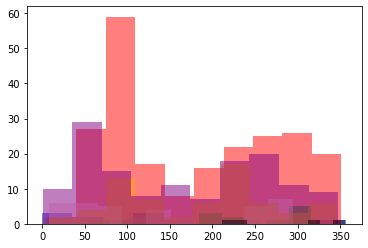

In [22]:
plt.hist(obsFile_cluster1['CompassA'], alpha=0.5, color = 'blue')
plt.hist(obsFile_cluster2['CompassA'], alpha=0.5, color = 'red')
plt.hist(obsFile_cluster3['CompassA'], alpha=0.5, color = 'green')
plt.hist(obsFile_cluster4['CompassA'], alpha=0.5, color = 'grey')
plt.hist(obsFile_cluster5['CompassA'], alpha=0.5, color = 'pink')
plt.hist(obsFile_cluster6['CompassA'], alpha=0.5, color = 'orange')
plt.hist(obsFile_cluster7['CompassA'], alpha=0.5, color = 'purple')
plt.hist(obsFile_cluster8['CompassA'], alpha=0.5, color = 'black')

In [23]:
def intercusp(group):
    result = group['CompassA'].max() - group['CompassA'].min()
    if result > 180:
        result = 360.-result
    return result

cusps = pd.DataFrame()
cusps_high = pd.DataFrame()
cusps_low = pd.DataFrame()
cusps['IC_angle'] = obsFileCompleteDataSet.groupby(['Cusp_ID']).apply(intercusp)
cusps_high['IC_angle'] = obsFile_highlats.groupby(['Cusp_ID']).apply(intercusp)
cusps_low['IC_angle'] = obsFile_lowlats.groupby(['Cusp_ID']).apply(intercusp)

#def get_intercusp(group):

# for i, row in obsFileCompleteDataSet.iterrows():
#     if (i%2 != 0):
#         firstVal = (row['CompassA'])
#     else:
#         secondVal = (row['CompassA'])
#         intercusp = abs(secondVal - firstVal)
    
#cusp_counts = pd.DataFrame()
#cusp_counts['num_cusps'] = obsFileCompleteDataSet.groupby(['Cusp_ID']).size()
#pd.DataFrame(cusps)

# cusps['Cusp_ID'] = cusps.index
# merged = obsFileCompleteDataSet.merge(obsFileCompleteDataSet, cusps, left_on=['Cusp_ID'], right_on=['Cusp_ID'])
cusps['TC_angle'] = 180.-cusps['IC_angle']
cusps_high['TC_angle'] = 180.-cusps_high['IC_angle']
cusps_low['TC_angle'] = 180.-cusps_low['IC_angle']
#cusps

In [24]:
cusps1 = pd.DataFrame()
cusps2 = pd.DataFrame()
cusps3 = pd.DataFrame()
cusps4 = pd.DataFrame()
cusps5 = pd.DataFrame()
cusps6 = pd.DataFrame()
cusps7 = pd.DataFrame()
cusps8 = pd.DataFrame()

cusps1['IC_angle'] = obsFile_cluster1.groupby(['Cusp_ID']).apply(intercusp)
cusps2['IC_angle'] = obsFile_cluster2.groupby(['Cusp_ID']).apply(intercusp)
cusps3['IC_angle'] = obsFile_cluster3.groupby(['Cusp_ID']).apply(intercusp)
cusps4['IC_angle'] = obsFile_cluster4.groupby(['Cusp_ID']).apply(intercusp)
cusps5['IC_angle'] = obsFile_cluster5.groupby(['Cusp_ID']).apply(intercusp)
cusps6['IC_angle'] = obsFile_cluster6.groupby(['Cusp_ID']).apply(intercusp)
cusps7['IC_angle'] = obsFile_cluster7.groupby(['Cusp_ID']).apply(intercusp)
cusps8['IC_angle'] = obsFile_cluster8.groupby(['Cusp_ID']).apply(intercusp)

cusps1['TC_angle'] = 180.-cusps1['IC_angle']
cusps2['TC_angle'] = 180.-cusps2['IC_angle']
cusps3['TC_angle'] = 180.-cusps3['IC_angle']
cusps4['TC_angle'] = 180.-cusps4['IC_angle']
cusps5['TC_angle'] = 180.-cusps5['IC_angle']
cusps6['TC_angle'] = 180.-cusps6['IC_angle']
cusps7['TC_angle'] = 180.-cusps7['IC_angle']
cusps8['TC_angle'] = 180.-cusps8['IC_angle']

#display(cusps2)

In [ ]:
plt.figure(figsize=(10,7))

plt.hist(cusps['TC_angle'], alpha=0.5, color = 'black', range=[0,180], bins = 18)

# plt.hist(cusps1['TC_angle'], alpha=0.5, color = 'blue', range=[0,180], bins = 18)
# #plt.hist(cusps2['TC_angle'], alpha=0.5, color = 'red', range=[0,180], bins = 18)
# plt.hist(cusps3['TC_angle'], alpha=0.5, color = 'green', range=[0,180], bins = 18)
# plt.hist(cusps4['TC_angle'], alpha=0.5, color = 'grey', range=[0,180], bins = 18)
# plt.hist(cusps5['TC_angle'], alpha=0.5, color = 'pink', range=[0,180], bins = 18)
# #plt.hist(cusps6['TC_angle'], alpha=0.5, color = 'orange', range=[0,180], bins = 18)
# #plt.hist(cusps7['TC_angle'], alpha=0.5, color = 'purple', range=[0,180], bins = 18)
# plt.hist(cusps8['TC_angle'], alpha=0.5, color = 'black', range=[0,180], bins = 18)

#plt.savefig('Cusps_TC_angles_all')
plt.figure(figsize=(10,7))

#plt.hist(cusps['TC_angle'], alpha=0.5, color = 'black', linestyle = '-', fill=True, range=[0,180], bins = 18)
# plt.hist(cusps2['TC_angle'], alpha=0.5, color = 'red', range=[0,180], bins = 18)
# #plt.hist(cusps5['TC_angle'], alpha=0.5, color = 'pink', range=[0,180], bins = 18)
# plt.hist(cusps6['TC_angle'], alpha=0.5, color = 'yellow', range=[0,180], bins = 18)
# plt.hist(cusps7['TC_angle'], alpha=0.5, color = 'purple', range=[0,180], bins = 18)
#plt.hist(cusps['TC_angle'], alpha=0.5, color='grey', hatch='.', edgecolor = 'k', fill=True, range=[0,180], bins = 18)
plt.hist(cusps2['TC_angle'], color='black', range=[0,180], bins = 18) # red
plt.hist(cusps7['TC_angle'], color = 'darkgrey', range=[0,180], bins = 18) # purple
plt.hist(cusps6['TC_angle'], color = 'grey',range=[0,180], bins = 18) # orange/yellow
plt.hist(cusps5['TC_angle'], alpha=0.4, color='grey', hatch='/', edgecolor = 'k', fill=True, range=[0,180], bins = 18) # pink

plt.savefig('Cusps_TC_angles_bigregions')

In [ ]:
#plt.hist(cusps['IC_angle'], alpha=0.5, label = 'intercusp angle')
#plt.hist(cusps['TC_angle'], alpha=0.5, label = 'tail crack angle')
#plt.legend(loc='lower right')

plt.figure(figsize=(10,7))
plt.hist(cusps['TC_angle'], color='grey', range=[0,180], bins = 18)
plt.savefig('Cusp_TCangles_all.png')

plt.figure(figsize=(10,7))
plt.hist(cusps_low['TC_angle'], alpha=0.8, color = 'black', range=[0,180], bins = 18)
plt.hist(cusps_high['TC_angle'], alpha=0.5, color = 'darkgrey', range=[0,180], bins = 18)
plt.savefig('Cusp_TCangles_lonlat.png')

#plt.title('Inferred tail crack angles')
         
(mu1, sigma1) = norm.fit(cusps['TC_angle']) # <== should be observed directions modified by longitude
(mu2, sigma2) = norm.fit(cusps_high['TC_angle'])
(mu3, sigma3) = norm.fit(cusps_low['TC_angle'])

print(mu1, sigma1)
print(mu2, sigma2)
print(mu3, sigma3)


In [25]:
# grouped = obsFileCompleteDataSet.groupby(['Cycloid_Nu'])

# def get_right(group):
#     return group[::2]

# def get_left(group):
#     return group[1::2]

outputRight = obsFileCompleteDataSet.loc[obsFileCompleteDataSet.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft = obsFileCompleteDataSet.loc[obsFileCompleteDataSet.index%2==1]#pd.DataFrame(grouped.apply(get_left))

print(len(outputRight), len(outputLeft))


247 247


In [26]:
outputRight1 = obsFile_cluster1.loc[obsFile_cluster1.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft1 = obsFile_cluster1.loc[obsFile_cluster1.index%2==1]#pd.DataFrame(grouped.apply(get_left))

outputRight2 = obsFile_cluster2.loc[obsFile_cluster2.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft2 = obsFile_cluster2.loc[obsFile_cluster2.index%2==1]#pd.DataFrame(grouped.apply(get_left))

outputRight3 = obsFile_cluster3.loc[obsFile_cluster3.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft3 = obsFile_cluster3.loc[obsFile_cluster3.index%2==1]#pd.DataFrame(grouped.apply(get_left))

outputRight4 = obsFile_cluster4.loc[obsFile_cluster4.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft4 = obsFile_cluster4.loc[obsFile_cluster4.index%2==1]#pd.DataFrame(grouped.apply(get_left))

outputRight5 = obsFile_cluster5.loc[obsFile_cluster5.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft5 = obsFile_cluster5.loc[obsFile_cluster5.index%2==1]#pd.DataFrame(grouped.apply(get_left))

outputRight6 = obsFile_cluster6.loc[obsFile_cluster6.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft6 = obsFile_cluster6.loc[obsFile_cluster6.index%2==1]#pd.DataFrame(grouped.apply(get_left))

outputRight7 = obsFile_cluster7.loc[obsFile_cluster7.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft7 = obsFile_cluster7.loc[obsFile_cluster7.index%2==1]#pd.DataFrame(grouped.apply(get_left))

outputRight8 = obsFile_cluster8.loc[obsFile_cluster8.index%2==0] #pd.DataFrame(grouped.apply(get_right))
outputLeft8 = obsFile_cluster8.loc[obsFile_cluster8.index%2==1]#pd.DataFrame(grouped.apply(get_left))




In [ ]:
display(obsFile_cluster1)
display(outputRight1[0:10])

In [ ]:
plt.figure(figsize=(7,5))

plt.hist(outputLeft1['CompassA'], alpha=0.5, color = 'blue', range=[0,360], bins = 36)
plt.hist(outputLeft2['CompassA'], alpha=0.5, color = 'red', range=[0,360], bins = 36)
plt.hist(outputLeft3['CompassA'], alpha=0.5, color = 'green', range=[0,360], bins = 36)
plt.hist(outputLeft4['CompassA'], alpha=0.5, color = 'grey', range=[0,360], bins = 36)
plt.hist(outputLeft5['CompassA'], alpha=0.5, color = 'pink', range=[0,360], bins = 36)
plt.hist(outputLeft6['CompassA'], alpha=0.5, color = 'orange', range=[0,360], bins = 36)
plt.hist(outputLeft7['CompassA'], alpha=0.5, color = 'purple', range=[0,360], bins = 36)
plt.hist(outputLeft8['CompassA'], alpha=0.5, color = 'black', range=[0,360], bins = 36)

plt.figure(figsize=(7,5))

#plt.hist(outputRight1['CompassA'], alpha=0.5, color = 'blue', range=[0,360], bins = 36)
#plt.hist(outputRight2['CompassA'], alpha=0.5, color = 'red', range=[0,360], bins = 36)
#plt.hist(outputRight3['CompassA'], alpha=0.5, color = 'green', range=[0,360], bins = 36)
#plt.hist(outputRight4['CompassA'], alpha=0.5, color = 'grey', range=[0,360], bins = 36)
#plt.hist(outputRight5['CompassA'], alpha=0.5, color = 'pink', range=[0,360], bins = 36)
#plt.hist(outputRight6['CompassA'], alpha=0.5, color = 'orange', range=[0,360], bins = 36)
#plt.hist(outputRight7['CompassA'], alpha=0.5, color = 'purple', range=[0,360], bins = 36)
#plt.hist(outputRight8['CompassA'], alpha=0.5, color = 'black', range=[0,360], bins = 36)




In [ ]:
plt.hist(outputRight['CompassA'])
plt.hist(outputLeft['CompassA'])

In [ ]:
#plt.hist(obsFile2['Takeoff'], color='purple')

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter((360-obsFileCompleteDataSet['Long_dd'])%360, obsFileCompleteDataSet['Lat_dd'], s=10, c = 'black')
#plt.scatter(obsFileCompleteDataSet['Long_dd'], obsFileCompleteDataSet['Lat_dd'], s=3)

# for index, row in obsFileCompleteDataSet.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
#     plt.scatter((360-(row['Long_dd']))%360, row['Lat_dd'], marker=t, s=200, color='purple')
#     #plt.scatter(row['Long_dd'], row['Lat_dd'], marker=t, s=200, color='purple')

for index, row in outputLeft.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter((360-(row['Long_dd']))%360, row['Lat_dd'], marker=t, s=200, c='black')

for index, row in outputRight.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter((360-(row['Long_dd']))%360, row['Lat_dd'], marker=t, s=200, c='black')

#plt.savefig('Cusps_ObsMap.png')

# Functions for calculating stress, formatting predictions

In [27]:
def computeStress(data, thresh, latColName, eastlonColName, interior, ecc, steps, this_step, oblq, phase, NSRdelta):
#def getStress(interior, e, colat, lon, steps, this_step, oblq, phase, NSRdelta):


    output = []
    
    # iterate over rows with iterrows()
    for index, row in data.iterrows():
        stressList = []
        dirList = []
        thisStep = 0
        gotIt = 0
        colat = radians(90. - row[latColName])
        lon = radians(row[eastlonColName])
        #print(step, thisStep, colat, lon)
        #breakpoint()
        #stress = StressEQs.getStress(interior, ecc, colat, lon, steps, thisStep, oblq, phase, NSRdelta)
        while thisStep < steps:
            stress = StressEQs.getStress(interior, ecc, colat, lon, steps, thisStep, radians(oblq), radians(phase), NSRdelta)
            stressList.append(stress[0])
            dirList.append(degrees(stress[1]))
            thisStep += 1
            #print('getting stress')
        maxIndex = stressList.index(max(stressList))
        for i, each in enumerate(stressList[1:]):
            if (stressList[i-1] < thresh and each > thresh):
                threshStress = each
                threshDir = dirList[i]
                gotIt = 1
        if gotIt == 0:
            if (stressList[-1] < thresh and stressList[0] > thresh):
                threshStress = stressList[0]
                threshDir = dirList[0]
                gotIt = 1
            else: 
                threshStress = 0
                threshDir = 0
        #output.append(row['Lat_dd'], row['EastLon'], max(stressList), dirList[maxIndex])
        output.append((row[latColName], row[eastlonColName], max(stressList), dirList[maxIndex], threshStress, threshDir))

    result = pd.DataFrame()
    result['Lat'] = [x[0] for x in output]
    result['EastLon'] = [x[1] for x in output]
    result['MaxStress'] = [x[2] for x in output]
    result['MaxDir'] = [x[3] for x in output]
    result['ThreshStress'] = [x[4] for x in output]
    result['ThreshDir'] = [x[5] for x in output]

    return(result)

In [28]:
def getDiffs(inputDF):
    tempList = []

    for index, row in inputDF.iterrows():
        #print(row)
        if row['ObsDir'] < 180.:
            row['Diff'] = abs(row['MaxDir'] - (180.+row['ObsDir']))%360
            row['DiffThresh'] = abs(row['ThreshDir'] - (180.+row['ObsDir']))%360
        else:
            row['Diff'] = abs(row['MaxDir'] - row['ObsDir'])%360
            row['DiffThresh'] = abs(row['ThreshDir'] - row['ObsDir'])%360
        tempList.append((row['Diff'], row['DiffThresh']))

    return tempList


# Specify tidal stress parameters

In [29]:
int_val = 1
ecc_val = 1111
steps_val = 360
thisStep_val = 0
oblqDeg_val = 0.5
phaseDeg_val = 0
NSR_val = 0

thresh_val = 50      # 64 for ecc, 75 for oblq, 140 for NSR 43, 185 for NSR 25

# Compute stresses at specific locations

In [ ]:
outputMaster = computeStress(obsFileCompleteDataSet, thresh_val, 'Lat_dd', 'Long_dd', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, phaseDeg_val, NSR_val)
              #computeStress(data, thresh, latColName, eastlonColName, interior, ecc, steps, this_step, oblq, phase, NSRdelta)

outputMaster['ObsDir'] = obsFileCompleteDataSet['CompassA']

diffList = getDiffs(outputMaster)

outputMaster['Diff'] = [x[0] for x in diffList]
outputMaster['DiffThresh'] = [x[1] for x in diffList]

len(outputMaster)
print(max(outputMaster['MaxStress']))
print(min(outputMaster['MaxStress']))
#outputMaster

In [ ]:
outputRightMaster = computeStress(outputRight, thresh_val, 'Lat_dd', 'Long_dd', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, phaseDeg_val, NSR_val)
              #computeStress(data, thresh, latColName, eastlonColName, interior, ecc, steps, this_step, oblq, phase, NSRdelta)

temp = outputRight['CompassA'].to_frame().reset_index()
tempList = []

for index, row in temp.iterrows():
    tempList.append(row['CompassA'])

outputRightMaster['ObsDir'] = tempList
diffList = getDiffs(outputRightMaster)

outputRightMaster['Diff'] = [x[0] for x in diffList]
outputRightMaster['DiffThresh'] = [x[1] for x in diffList]

len(outputRightMaster)
print(max(outputRightMaster['MaxStress']))
print(min(outputRightMaster['MaxStress']))
#outputMaster
#outputRightMaster

In [ ]:
outputLeftMaster = computeStress(outputLeft, thresh_val, 'Lat_dd', 'Long_dd', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, phaseDeg_val, NSR_val)
              #computeStress(data, thresh, latColName, eastlonColName, interior, ecc, steps, this_step, oblq, phase, NSRdelta)

temp = outputLeft['CompassA'].to_frame().reset_index()
tempList = []

for index, row in temp.iterrows():
    tempList.append(row['CompassA'])

outputLeftMaster['ObsDir'] = tempList
diffList = getDiffs(outputLeftMaster)

outputLeftMaster['Diff'] = [x[0] for x in diffList]
outputLeftMaster['DiffThresh'] = [x[1] for x in diffList]

len(outputLeftMaster)
print(max(outputLeftMaster['MaxStress']))
print(min(outputLeftMaster['MaxStress']))



# Compute stresses at specific locations while varying SPD

In [ ]:
inputDF = obsFileCompleteDataSet
lat_column = 'Lat_dd'
lon_column = 'Long_dd'
angle_column = 'CompassA'

# inputDF = outputLeftMaster
# lat_column = 'Lat'
# lon_column = 'EastLon'
# angle_column = 'ObsDir'

outputMasterSPD0 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 0, NSR_val)
outputMasterSPD30 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 30, NSR_val)
outputMasterSPD60 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 60, NSR_val)
outputMasterSPD90 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 90, NSR_val)
outputMasterSPD120 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 120, NSR_val)
outputMasterSPD150 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 150, NSR_val)

In [ ]:
inputDF = obsFileCompleteDataSet
lat_column = 'Lat_dd'
lon_column = 'Long_dd'
angle_column = 'CompassA'

# inputDF = outputLeftMaster
# lat_column = 'Lat'
# lon_column = 'EastLon'
# angle_column = 'ObsDir'

outputMasterSPD180 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 180, NSR_val)
outputMasterSPD210 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 210, NSR_val)
outputMasterSPD240 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 240, NSR_val)
outputMasterSPD270 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 270, NSR_val)
outputMasterSPD300 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 300, NSR_val)
outputMasterSPD330 = computeStress(inputDF, thresh_val, lat_column, lon_column, int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 330, NSR_val)


In [ ]:
outputMasterSPD0['ObsDir'] = inputDF[angle_column]
# outputMasterSPD30['ObsDir'] = inputDF[angle_column]
# outputMasterSPD60['ObsDir'] = inputDF[angle_column]
outputMasterSPD90['ObsDir'] = inputDF[angle_column]
# outputMasterSPD120['ObsDir'] = inputDF[angle_column]
# outputMasterSPD150['ObsDir'] = inputDF[angle_column]
outputMasterSPD180['ObsDir'] = inputDF[angle_column]
# outputMasterSPD210['ObsDir'] = inputDF[angle_column]
# outputMasterSPD240['ObsDir'] = inputDF[angle_column]
outputMasterSPD270['ObsDir'] = inputDF[angle_column]
# outputMasterSPD300['ObsDir'] = inputDF[angle_column]
# outputMasterSPD330['ObsDir'] = inputDF[angle_column]


diffList = getDiffs(outputMasterSPD0)
outputMasterSPD0['Diff'] = [x[0] for x in diffList]
outputMasterSPD0['DiffThresh'] = [x[1] for x in diffList]

# diffList = getDiffs(outputMasterSPD30)
# outputMasterSPD30['Diff'] = [x[0] for x in diffList]
# outputMasterSPD30['DiffThresh'] = [x[1] for x in diffList]

# diffList = getDiffs(outputMasterSPD60)
# outputMasterSPD60['Diff'] = [x[0] for x in diffList]
# outputMasterSPD60['DiffThresh'] = [x[1] for x in diffList]

diffList = getDiffs(outputMasterSPD90)
outputMasterSPD90['Diff'] = [x[0] for x in diffList]
outputMasterSPD90['DiffThresh'] = [x[1] for x in diffList]

# diffList = getDiffs(outputMasterSPD120)
# outputMasterSPD120['Diff'] = [x[0] for x in diffList]
# outputMasterSPD120['DiffThresh'] = [x[1] for x in diffList]

# diffList = getDiffs(outputMasterSPD150)
# outputMasterSPD150['Diff'] = [x[0] for x in diffList]
# outputMasterSPD150['DiffThresh'] = [x[1] for x in diffList]

diffList = getDiffs(outputMasterSPD180)
outputMasterSPD180['Diff'] = [x[0] for x in diffList]
outputMasterSPD180['DiffThresh'] = [x[1] for x in diffList]

# diffList = getDiffs(outputMasterSPD210)
# outputMasterSPD210['Diff'] = [x[0] for x in diffList]
# outputMasterSPD210['DiffThresh'] = [x[1] for x in diffList]

# diffList = getDiffs(outputMasterSPD240)
# outputMasterSPD240['Diff'] = [x[0] for x in diffList]
# outputMasterSPD240['DiffThresh'] = [x[1] for x in diffList]

diffList = getDiffs(outputMasterSPD270)
outputMasterSPD270['Diff'] = [x[0] for x in diffList]
outputMasterSPD270['DiffThresh'] = [x[1] for x in diffList]

# diffList = getDiffs(outputMasterSPD300)
# outputMasterSPD300['Diff'] = [x[0] for x in diffList]
# outputMasterSPD300['DiffThresh'] = [x[1] for x in diffList]

# diffList = getDiffs(outputMasterSPD330)
# outputMasterSPD330['Diff'] = [x[0] for x in diffList]
# outputMasterSPD330['DiffThresh'] = [x[1] for x in diffList]


In [ ]:
bestFit = []
rows = []

SPD_DF = pd.DataFrame()
SPD_DF = outputMasterSPD0

SPD_DF['SPD0_diff'] = outputMasterSPD0['Diff']
# SPD_DF['SPD30_diff'] = outputMasterSPD90['Diff']
# SPD_DF['SPD60_diff'] = outputMasterSPD90['Diff']
SPD_DF['SPD90_diff'] = outputMasterSPD90['Diff']
# SPD_DF['SPD120_diff'] = outputMasterSPD120['Diff']
# SPD_DF['SPD150_diff'] = outputMasterSPD150['Diff']
SPD_DF['SPD180_diff'] = outputMasterSPD180['Diff']
# SPD_DF['SPD210_diff'] = outputMasterSPD210['Diff']
# SPD_DF['SPD240_diff'] = outputMasterSPD240['Diff']
SPD_DF['SPD270_diff'] = outputMasterSPD270['Diff']
# SPD_DF['SPD300_diff'] = outputMasterSPD300['Diff']
# SPD_DF['SPD330_diff'] = outputMasterSPD330['Diff']


SPD_DF['SPD0_diffthresh'] = outputMasterSPD0['DiffThresh']
# SPD_DF['SPD30_diffthresh'] = outputMasterSPD30['DiffThresh']
# SPD_DF['SPD60_diffthresh'] = outputMasterSPD60['DiffThresh']
SPD_DF['SPD90_diffthresh'] = outputMasterSPD90['DiffThresh']
# SPD_DF['SPD120_diffthresh'] = outputMasterSPD120['DiffThresh']
# SPD_DF['SPD150_diffthresh'] = outputMasterSPD150['DiffThresh']
SPD_DF['SPD180_diffthresh'] = outputMasterSPD180['DiffThresh']
# SPD_DF['SPD210_diffthresh'] = outputMasterSPD210['DiffThresh']
# SPD_DF['SPD240_diffthresh'] = outputMasterSPD240['DiffThresh']
SPD_DF['SPD270_diffthresh'] = outputMasterSPD270['DiffThresh']
# SPD_DF['SPD300_diffthresh'] = outputMasterSPD300['DiffThresh']
# SPD_DF['SPD330_diffthresh'] = outputMasterSPD330['DiffThresh']


for index, row in SPD_DF.iterrows():
    bestFit.append(min(row[9:23]))
    rows.append(row[9:23])
#     mindex.append(row[9:23].idxmin(axis=1))

SPD_DF['bestFit'] = bestFit

row_frame = pd.DataFrame(rows)
min_cols = row_frame.idxmin(axis=1)
SPD_DF['bestFitIndex'] = min_cols

plt.hist(SPD_DF['bestFit'])
#SPD_DF['bestFit']

In [ ]:
SPD_bestFits = SPD_DF.loc[SPD_DF['bestFit'] < 5]
SPD_worstFits = SPD_DF.loc[SPD_DF['bestFit'] > 5]

SPD_bestFits['bestFitIndex']


In [ ]:
# SPD_bestFits_left = SPD_DF.loc[SPD_DF['bestFit'] < 5]
# SPD_worstFits_left = SPD_DF.loc[SPD_DF['bestFit'] > 5]

# SPD_bestFits_right = SPD_DF.loc[SPD_DF['bestFit'] < 5]
# SPD_worstFits_right = SPD_DF.loc[SPD_DF['bestFit'] > 5]

print(len(SPD_bestFits_left))
print(len(SPD_bestFits_right))

print(len(SPD_worstFits_left))
print(len(SPD_worstFits_right))

In [ ]:
# Plotting locations of fits with SPD change

plt.figure(figsize=(20,10))
plt.xlim(370, -10)

plt.scatter((360. - SPD_DF['Long_dd'])%360, SPD_DF['Lat'], s=3)

for index, row in SPD_worstFits.iterrows():
    plt.scatter((360.-row['Long_dd'])%360, row['Lat'], s=5, color='red')

for index, row in SPD_bestFits.iterrows():
    plt.scatter((360.-row['Long_dd'])%360, row['Lat'], s=5, color='blue')

    
# for index, row in SPD_worstFits_right.iterrows():
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], s=5, color='red')

# for index, row in SPD_bestFits_right.iterrows():
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], s=5, color='green')

# for index, row in SPD_worstFits_left.iterrows():
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], s=5, color='red')

# for index, row in SPD_bestFits_left.iterrows():
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], s=5, color='blue')



# Compute stresses on a grid w/ and w/out varying SPD

In [ ]:
gridData = pd.DataFrame()
lats = arange(-75,90,15)
lons = arange(0,360,10)
newlats = []
newlons = []

for each in lons:
    for val in lats:
        newlats.append(val)
        newlons.append(each)

gridData['latGrid'] = newlats
gridData['lonGrid'] = newlons
gridOutput = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, phaseDeg_val, NSR_val)
#print(max(gridOutput['MaxStress']))
#print(min(gridOutput['MaxStress']))

In [ ]:
gridOutputSPD0 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 0, NSR_val)
#gridOutputSPD30 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 30, NSR_val)
#gridOutputSPD60 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 60, NSR_val)
gridOutputSPD90 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 90, NSR_val)
#gridOutputSPD120 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 120, NSR_val)
#gridOutputSPD150 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 150, NSR_val)
gridOutputSPD180 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 180, NSR_val)
#gridOutputSPD210 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 210, NSR_val)
#gridOutputSPD240 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 240, NSR_val)
gridOutputSPD270 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 270, NSR_val)
#gridOutputSPD300 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 300, NSR_val)
#gridOutputSPD330 = computeStress(gridData, thresh_val, 'latGrid', 'lonGrid', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, 330, NSR_val)

In [ ]:
gridOutputSPD0 = gridOutputSPD0.loc[gridOutputSPD0['MaxStress'] > thresh_val]
print("Here I go")
# gridOutputSPD30 = gridOutputSPD30.loc[gridOutputSPD30['MaxStress'] > thresh_val]
# print("Again on my own")
# gridOutputSPD60 = gridOutputSPD60.loc[gridOutputSPD60['MaxStress'] > thresh_val]
# print("Goin' down the only road")
gridOutputSPD90 = gridOutputSPD90.loc[gridOutputSPD90['MaxStress'] > thresh_val]
print("I've ever known")
# gridOutputSPD120 = gridOutputSPD120.loc[gridOutputSPD120['MaxStress'] > thresh_val]
# print("Like a drifter, I was born")
# gridOutputSPD150 = gridOutputSPD150.loc[gridOutputSPD150['MaxStress'] > thresh_val]
# print("To walk alone")
gridOutputSPD180 = gridOutputSPD180.loc[gridOutputSPD180['MaxStress'] > thresh_val]
print("But I know what it means")
# gridOutputSPD210 = gridOutputSPD210.loc[gridOutputSPD210['MaxStress'] > thresh_val]
# print("To walk along")
# gridOutputSPD240 = gridOutputSPD240.loc[gridOutputSPD240['MaxStress'] > thresh_val]
# print("The lonely street of dreams")
gridOutputSPD270 = gridOutputSPD270.loc[gridOutputSPD270['MaxStress'] > thresh_val]
print("Here I go again")
# gridOutputSPD300 = gridOutputSPD300.loc[gridOutputSPD300['MaxStress'] > thresh_val]
# print("On my own")
# gridOutputSPD330 = gridOutputSPD330.loc[gridOutputSPD330['MaxStress'] > thresh_val]

# Trim results to match threshold and map results

In [ ]:
outputMaster_trimmed = outputMaster.loc[outputMaster['ThreshStress'] != 0]
outputMaster_GTthresh = outputMaster.loc[outputMaster['MaxStress'] > thresh_val]  # ignoring regions with peak stress < 75 kPa


In [ ]:
gridOutput_trimmed = gridOutput.loc[gridOutput['ThreshStress'] != 0]
gridOutput_GTthresh = gridOutput.loc[gridOutput['MaxStress'] > thresh_val]  # ignoring regions with peak stress < 75 kPa


In [ ]:
plt.figure(figsize=(7,7))

plt.hist(outputMaster['Diff'], alpha = 0.5)       # blue
plt.hist(outputMaster_GTthresh['Diff'], alpha = 0.5)  # orange

plt.hist(outputMaster_trimmed['DiffThresh'], alpha = 0.5) # green

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))

plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3)

# for each in outputLeft['CompassA']:
#     t = mpl.markers.MarkerStyle(marker='|')
#     lon = outputLeft.loc[outputLeft['CompassA'] == each, 'WestLon']
#     lat = outputLeft.loc[outputLeft['CompassA'] == each, 'Lat_dd']
#     t._transform = t.get_transform().rotate_deg(360.0-each)
#     plt.scatter(lon, lat, marker=t, s=200, color='blue')
    
# for each in outputRight['CompassA']:
#     t = mpl.markers.MarkerStyle(marker='|')
#     lon = outputRight.loc[outputRight['CompassA'] == each, 'WestLon']
#     lat = outputRight.loc[outputRight['CompassA'] == each, 'Lat_dd']
#     t._transform = t.get_transform().rotate_deg(360.0-each)
#     plt.scatter(lon, lat, marker=t, s=200, color='red')

for index, row in obsFileCompleteDataSet.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter(row['WestLon'], row['Lat_dd'], marker=t, s=200, color='blue')
    
# for index, row in outputMaster.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='purple')

for index, row in outputMaster_GTthresh.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='red')


# for index, row in outputMaster.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='green')

# for index, row in outputMaster_trimmed.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='orange')

# Stress patterns on a grid

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3)

# for index, row in obsFileCompleteDataSet.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
#     plt.scatter(row['WestLon'], row['Lat_dd'], marker=t, s=200, color='blue')
    
# for index, row in gridOutput.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='purple')

for index, row in gridOutput_GTthresh.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='black') #red

    
# for index, row in gridOutput.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='green')

for index, row in gridOutput_trimmed.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='darkgrey') #orange

#plt.savefig('Cusps_eccStresses.png')

In [ ]:
plt.figure(figsize=(10,7))
plt.xlim(0.0005, 0.0045)
#plt.xlim(200, 140)

for index, row in outputLeft.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter(0.001, row['binnedLat'], marker=t, s=200, color='blue')
    
for index, row in outputRight.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter(0.002, row['binnedLat'], marker=t, s=200, color='blue')

    
# for index, row in gridOutput.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='purple')

for index, row in gridOutput_GTthresh.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter(.003, row['Lat'], marker=t, s=200, color='black') # red

    
# for index, row in gridOutput.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='green')

for index, row in gridOutput_trimmed.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter(.004, row['Lat'], marker=t, s=200, color='darkgrey') # orange


plt.savefig('Cusps_eccStresses_fitWithLon.png')

In [ ]:
plt.figure(figsize=(7,7))

# plt.hist(outputLeft['CompassA'], alpha = 0.5)         # blue
# plt.hist(outputRight['CompassA'], alpha = 0.5)        # orange
# plt.hist(outputMaster['MaxDir'], alpha = 0.5)        # green
# plt.hist(outputMaster['ThreshDir'], alpha = 0.5, color="purple")     # purple

plt.hist(outputLeft['CompassA'], alpha = 0.5, color='blue')         
plt.hist(outputRight['CompassA'], alpha = 0.5, color='purple')       
plt.hist(outputMaster_GTthresh['MaxDir'], alpha = 0.65, color='red')        
plt.hist(outputMaster_trimmed['ThreshDir'], alpha = 0.65, color="orange")    



In [ ]:
plt.figure(figsize=(7,7))

plt.hist(outputMaster_trimmed['MaxStress'], alpha = 0.5)        # blue
plt.hist(outputMaster_trimmed['ThreshStress'], alpha = 0.5, color="purple")     # purple

plt.hist(outputMaster['MaxStress'], alpha = 0.5)        # blue
#plt.hist(outputMaster['ThreshStress'], alpha = 0.5)     # purple



In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=10, color='black')

#goodFits = outputMaster.loc[outputMaster['ThreshDir'] > 0.]
#goodFits = goodFits.loc[outputMaster['DiffThresh'] < 5.]

goodFits = outputMaster_GTthresh.loc[outputMaster['Diff'] < 10.]
#print( len(goodFits))
#goodFits = outputMaster.loc[outputMaster['Diff'] < 10.]


# for index, row in goodFits.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ObsDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=150, color='blue')

for index, row in goodFits.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=300, color='black') # red

goodFits = outputMaster.loc[outputMaster['DiffThresh'] < 10.]

# for index, row in goodFits.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ObsDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=150, color='blue')

for index, row in goodFits.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='grey') # orange

plt.savefig('Cusps_eccStresses_fit.png')

In [ ]:
print( len(goodFits))

In [ ]:
goodFits = outputMaster.loc[outputMaster['Diff'] < 10.]
print( len(goodFits))

In [ ]:
#print(goodFits)
print(min(goodFits['MaxStress']), max(goodFits['MaxStress']))
plt.hist(goodFits['MaxStress'])

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))

plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3)

goodFits = outputMaster.loc[outputMaster['DiffThresh'] < 10.]

for index, row in goodFits.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='green')

for index, row in goodFits.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ObsDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=150, color='black')

In [ ]:
print( len(goodFits))

# Plot results with varying SPD

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))

plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3, color='blue')

for index, row in obsFileCompleteDataSet.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter(row['WestLon'], row['Lat_dd'], marker=t, s=200, color='blue')

for index, row in gridOutputSPD0.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='purple')
    
# for index, row in gridOutputSPD30.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='blue')

# for index, row in gridOutputSPD60.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='cyan')

for index, row in gridOutputSPD90.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='green')

# for index, row in gridOutputSPD120.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='yellow')

# for index, row in gridOutputSPD150.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='orange')

for index, row in gridOutputSPD180.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='yellow')
    
# for index, row in gridOutputSPD210.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='red')
    
# for index, row in gridOutputSPD240.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='red')

for index, row in gridOutputSPD270.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='orange')
    
# for index, row in gridOutputSPD300.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='red')
    
# for index, row in gridOutputSPD330.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='red')

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))

#plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3)

plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3, color='blue')

for index, row in obsFileCompleteDataSet.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter(row['WestLon'], row['Lat_dd'], marker=t, s=200, color='blue')

for index, row in gridOutputSPD0.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='purple')
    
# for index, row in gridOutputSPD30.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='purple')

# for index, row in gridOutputSPD60.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='purple')
 
for index, row in gridOutputSPD90.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='green')

# for index, row in gridOutputSPD120.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='yellow')

# for index, row in gridOutputSPD150.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='orange')

for index, row in gridOutputSPD180.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='yellow')
    
for index, row in gridOutputSPD270.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='orange')





In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))

plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3, color='black')

for index, row in obsFileCompleteDataSet.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter(row['WestLon'], row['Lat_dd'], marker=t, s=200, color='blue')

for index, row in gridOutputSPD270.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='red')

for index, row in gridOutputSPD270.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='orange')
    



In [ ]:
plt.figure(figsize=(10,7))
plt.xlim(0.0005, 0.007)
#plt.xlim(200, 140)

for index, row in outputLeft.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter(0.001, row['binnedLat'], marker=t, s=200, color='blue')
    
for index, row in outputRight.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
    plt.scatter(0.002, row['binnedLat'], marker=t, s=200, color='blue')

    
# for index, row in gridOutput.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
#     plt.scatter((360.-row['EastLon'])%360, row['Lat'], marker=t, s=200, color='purple')

for index, row in gridOutputSPD0.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter(.003, row['Lat'], marker=t, s=200, color='red')

for index, row in gridOutputSPD90.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter(.0035, row['Lat'], marker=t, s=200, color='red')

for index, row in gridOutputSPD180.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter(.004, row['Lat'], marker=t, s=200, color='red')

for index, row in gridOutputSPD270.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['MaxDir'])
    plt.scatter(.0045, row['Lat'], marker=t, s=200, color='red')


for index, row in gridOutputSPD0.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter(.005, row['Lat'], marker=t, s=200, color='orange')

for index, row in gridOutputSPD90.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter(.0055, row['Lat'], marker=t, s=200, color='orange')

for index, row in gridOutputSPD90.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter(.006, row['Lat'], marker=t, s=200, color='orange')


for index, row in gridOutputSPD90.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['ThreshDir'])
    plt.scatter(.0065, row['Lat'], marker=t, s=200, color='orange')




# Getting stress that results in observed orientation

In [30]:
def getStressCurves(data, thresh, latColName, eastlonColName, interior, ecc, steps, this_step, oblq, phase, NSRdelta):
#def getStress(interior, e, colat, lon, steps, this_step, oblq, phase, NSRdelta):


    output = []
    
    # iterate over rows with iterrows()
    for index, row in data.iterrows():
        stressList = []
        dirList = []
        thisStep = 0
        gotIt = 0
        #obsDir = row['CompassA']
        colat = radians(90. - row[latColName])
        lon = radians(row[eastlonColName])
        while thisStep < steps:
            stress = StressEQs.getStress(interior, ecc, colat, lon, steps, thisStep, radians(oblq), radians(phase), NSRdelta)
#             stressList.append(stress[0])
#             dirList.append(degrees(stress[1]))
            thisStep += 1
        
            output.append({
                'stress': stress[0],
                'dir': degrees(stress[1]),
                'lonEast': row[eastlonColName],
                'lat': row[latColName],
                'obsDir': row['CompassA'],
                'cycNum': row['Cycloid_Nu'],
                'cyc': index
            })
            
    outputDF = pd.DataFrame(output)

    return(outputDF)

In [31]:
int_val = 1
ecc_val = 1111
steps_val = 850
thisStep_val = 0
oblqDeg_val = 0.0
phaseDeg_val = 0
NSR_val = 0       # best not to use NSR for this because the orientations are non-unique

thresh_val = 50      # 64 for ecc, 75 for oblq, 140 for NSR 43, 185 for NSR 25

In [32]:
dataSample = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 0) & (obsFileCompleteDataSet['Cycloid_Nu'] < 90)]
#dataSample
outputCurves = getStressCurves(dataSample, thresh_val, 'Lat_dd', 'Long_dd', int_val, ecc_val, steps_val, thisStep_val, oblqDeg_val, phaseDeg_val, NSR_val)
              #computeStress(data, thresh, latColName, eastlonColName, interior, ecc, steps, this_step, oblq, phase, NSRdelta)


In [33]:
print(len(outputCurves))
outputCurves[355:365]

419900


,cyc,cycNum,dir,lat,lonEast,obsDir,stress
355,0,1,214.729609,45.386,8.614,113.869807,25.312076
356,0,1,214.516575,45.386,8.614,113.869807,25.030866
357,0,1,214.301535,45.386,8.614,113.869807,24.750158
358,0,1,214.084461,45.386,8.614,113.869807,24.469996
359,0,1,213.865326,45.386,8.614,113.869807,24.190422
360,0,1,213.644100,45.386,8.614,113.869807,23.911477
361,0,1,213.420758,45.386,8.614,113.869807,23.633206
362,0,1,213.195270,45.386,8.614,113.869807,23.355652
363,0,1,212.967609,45.386,8.614,113.869807,23.078860
364,0,1,212.737748,45.386,8.614,113.869807,22.802874


In [ ]:
plt.figure(figsize=(10,10))
currentIndex = 232
currentCurves = outputCurves.loc[outputCurves['cyc'] == currentIndex]

if currentCurves.iloc[currentIndex]['obsDir'] > 180.:
    currentObsDir = currentCurves.iloc[currentIndex]['obsDir']-180.
else:
    currentObsDir = currentCurves.iloc[currentIndex]['obsDir']
plt.scatter(currentCurves['dir']-180.,currentCurves['stress'], s=1)

plt.vlines(currentObsDir, 0, 60, linestyle = 'dashed')
plt.hlines(0, 0, 180, linestyle = 'dashed')


In [ ]:
print((outputCurves.loc[outputCurves['cyc'] == currentIndex]['lat']).values[0])
print(360.-(outputCurves.loc[outputCurves['cyc'] == currentIndex]['lonEast']).values[0])

In [ ]:
min_cyc = outputCurves['cyc'].min()
max_cyc = outputCurves['cyc'].max()
print(min_cyc, max_cyc)

In [ ]:
interpStress = []
for count in range(min_cyc, max_cyc, 1):
#for count in range(0, max(dataSample.index), 1): #arange(0, len(dataSample)): # len(dataSample)
    interpVals = outputCurves.loc[outputCurves['cyc']==count]['obsDir']
    if interpVals.values[0] > 180.:   # changing orientations to match with predictions 
        interpVal = interpVals.values[0] - 180.
    else:
        interpVal = interpVals.values[0]
    plotDir = (outputCurves.loc[outputCurves['cyc']==count]['obsDir']).values[0]
    tempDir = (outputCurves.loc[outputCurves['cyc']==count].sort_values('dir')['dir'])-180. 
    tempStress = outputCurves.loc[outputCurves['cyc']==count].sort_values('dir')['stress']
    tempLat = (outputCurves.loc[outputCurves['cyc']==count]['lat']).values[0]
    tempLon = (outputCurves.loc[outputCurves['cyc']==count]['lonEast']).values[0]
    
    stressDiff = np.diff(tempStress)
    dirDiff = np.diff(tempDir)

    slope = np.append(0, stressDiff / dirDiff)
    
    #print(len(tempStress), len(tempDir), len(stressDiff))
#     plt.figure(figsize=(10,10))
#     plt.scatter(tempDir, tempStress, s=1)
#     plt.figure(figsize=(10,10))
#     plt.scatter(tempDir, slope, s=1)
#     plt.vlines(interpVal, -4, 4, linestyle = 'dashed')
#     plt.hlines(0, -1, 180, linestyle = 'dashed')
    findStress = np.interp(interpVal,tempDir,tempStress)
    
    # direction -1 = decreasing, 0 = flat, 1 = increasing
    grad = np.interp(interpVal, tempDir, slope)
#     print(f'Direction: {direction}')
    if grad != 0:
        grad = -1 if grad < 0 else 1
    interpStress.append(
        {
            'stress': findStress,
            'grad': grad,
            'lonEast': tempLon,
            'lat': tempLat,
            'interpDir': interpVal,
            'obsDir': plotDir,
            'cyc': count
        }
    )

interpStress = pd.DataFrame(interpStress)
#display(interpStress)

In [ ]:
plt.hist(interpStress['stress'])

In [ ]:
findStuff = interpStress[(interpStress['grad'] != -1) & (interpStress['stress'] > 0)]
plt.hist(findStuff['stress'])

In [ ]:
interpFits = findStuff
#interpFits_Pt25spd330 = findStuff

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))

plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3)

# for each in outputLeft['CompassA']:
#     t = mpl.markers.MarkerStyle(marker='|')
#     lon = outputLeft.loc[outputLeft['CompassA'] == each, 'WestLon']
#     lat = outputLeft.loc[outputLeft['CompassA'] == each, 'Lat_dd']
#     t._transform = t.get_transform().rotate_deg(360.0-each)
#     plt.scatter(lon, lat, marker=t, s=200, color='blue')
    
# for each in outputRight['CompassA']:
#     t = mpl.markers.MarkerStyle(marker='|')
#     lon = outputRight.loc[outputRight['CompassA'] == each, 'WestLon']
#     lat = outputRight.loc[outputRight['CompassA'] == each, 'Lat_dd']
#     t._transform = t.get_transform().rotate_deg(360.0-each)
#     plt.scatter(lon, lat, marker=t, s=200, color='red')

# for index, row in obsFileCompleteDataSet.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
#     plt.scatter(row['WestLon'], row['Lat_dd'], marker=t, s=200, color='blue')
    
for index, row in findStuff.iterrows():
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
    if row['stress'] < 40:
        color_val = 'red'
    elif row['stress'] < 80:
        color_val = 'orange'
    else:
        color_val = 'purple'
    plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val)

In [ ]:
len(findStuff)

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))

stress_lim = 50

plt.scatter(obsFileCompleteDataSet['WestLon'], obsFileCompleteDataSet['Lat_dd'], s=3, color='blue')

# for each in outputLeft['CompassA']:
#     t = mpl.markers.MarkerStyle(marker='|')
#     lon = outputLeft.loc[outputLeft['CompassA'] == each, 'WestLon']
#     lat = outputLeft.loc[outputLeft['CompassA'] == each, 'Lat_dd']
#     t._transform = t.get_transform().rotate_deg(360.0-each)
#     plt.scatter(lon, lat, marker=t, s=200, color='blue')
    
# for each in outputRight['CompassA']:
#     t = mpl.markers.MarkerStyle(marker='|')
#     lon = outputRight.loc[outputRight['CompassA'] == each, 'WestLon']
#     lat = outputRight.loc[outputRight['CompassA'] == each, 'Lat_dd']
#     t._transform = t.get_transform().rotate_deg(360.0-each)
#     plt.scatter(lon, lat, marker=t, s=200, color='red')

# for index, row in obsFileCompleteDataSet.iterrows():
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['CompassA'])
#     plt.scatter(row['WestLon'], row['Lat_dd'], marker=t, s=200, color='blue')

for index, row in interpFits.iterrows():
    if row['stress'] < stress_lim:
        color_val = 'lightgrey'
        alpha_val = 0
    else:
        color_val = 'purple'
        alpha_val = 1
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
    #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='purple')
    plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)


# for index, row in interpFits_Pt25spd0.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='purple')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)

# for index, row in interpFits_Pt25spd30.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='purple')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)
    
# for index, row in interpFits_Pt25spd60.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='purple')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)

# for index, row in interpFits_Pt25spd90.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='green')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)
    
# for index, row in interpFits_Pt25spd120.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='green')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)
    
# for index, row in interpFits_Pt25spd150.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='green')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)
    
# for index, row in interpFits_Pt25spd180.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='teal')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)

# for index, row in interpFits_Pt25spd210.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='teal')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)
    
# for index, row in interpFits_Pt25spd240.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='teal')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)
    
# for index, row in interpFits_Pt25spd270.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='orange')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)
    
# for index, row in interpFits_Pt25spd300.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='orange')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)
    
# for index, row in interpFits_Pt25spd330.iterrows():
#     if row['stress'] < stress_lim:
#         color_val = 'lightgrey'
#         alpha_val = 0
#     else:
#         color_val = 'purple'
#         alpha_val = 1
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(360.0-row['obsDir'])
#     #plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color='orange')
#     plt.scatter((360.-row['lonEast'])%360, row['lat'], marker=t, s=200, color=color_val, alpha=alpha_val)




In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plotCycloids = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 0) & (obsFileCompleteDataSet['Cycloid_Nu'] < 5)]
plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'slateblue')

plotCycloids = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 5) & (obsFileCompleteDataSet['Cycloid_Nu'] < 37)]
plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'red')

plotCycloids = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 37) & (obsFileCompleteDataSet['Cycloid_Nu'] < 40)]
plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'green')

plotCycloids = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 40) & (obsFileCompleteDataSet['Cycloid_Nu'] < 43)]
plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'grey')

#plotCycloids = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 48) & (obsFileCompleteDataSet['Cycloid_Nu'] < 50)]
#plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'black')

plotCycloids = obsFileCompleteDataSet[((obsFileCompleteDataSet['Cycloid_Nu'] >= 50) & (obsFileCompleteDataSet['Cycloid_Nu'] < 53)) | ((obsFileCompleteDataSet['Cycloid_Nu'] >= 43) & (obsFileCompleteDataSet['Cycloid_Nu'] < 48))]
#plotCycloids = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 50) & (obsFileCompleteDataSet['Cycloid_Nu'] < 53)]
plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'pink')

plotCycloids = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 53) & (obsFileCompleteDataSet['Cycloid_Nu'] < 65)]
plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'orange')

plotCycloids = obsFileCompleteDataSet[((obsFileCompleteDataSet['Cycloid_Nu'] >= 65) & (obsFileCompleteDataSet['Cycloid_Nu'] < 89)) | ((obsFileCompleteDataSet['Cycloid_Nu'] >= 48) & (obsFileCompleteDataSet['Cycloid_Nu'] < 50))]
plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'purple')

plotCycloids = obsFileCompleteDataSet[(obsFileCompleteDataSet['Cycloid_Nu'] >= 87) & (obsFileCompleteDataSet['Cycloid_Nu'] < 89)]
plt.scatter(plotCycloids['WestLon'], plotCycloids['Lat_dd'], s=30, color = 'black')

#plt.savefig("Cusps_ClusterMap.png")